# Linear Regression Project. **Ecommerce Customers.**

Congratulations! You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:


* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

(Read in the Ecommerce Customers csv file and check out it.)

In [3]:
customers = pd.read_csv('Ecommerce Customers')
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
customers.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Exploratory Data Analysis




/Users/claudiacastro/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/claudiacastro/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


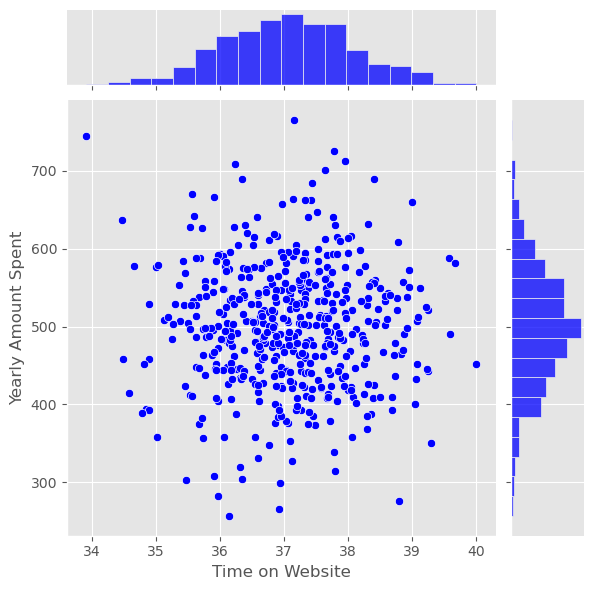

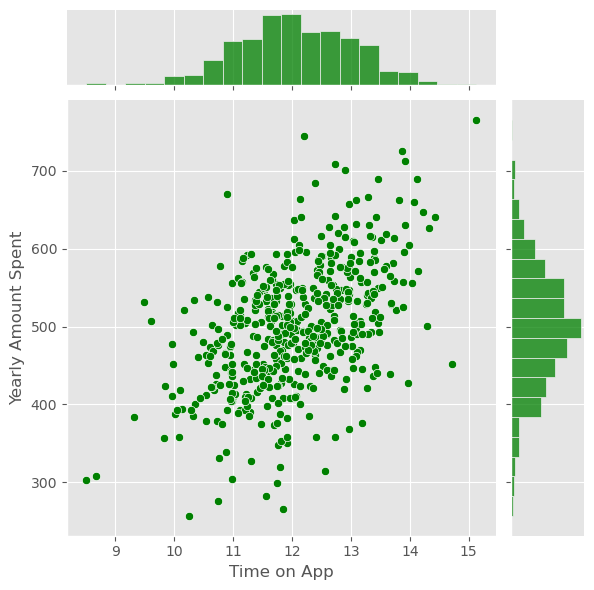

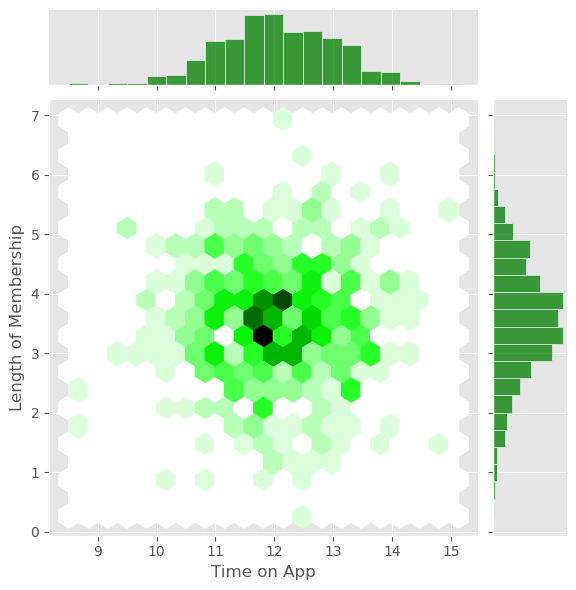

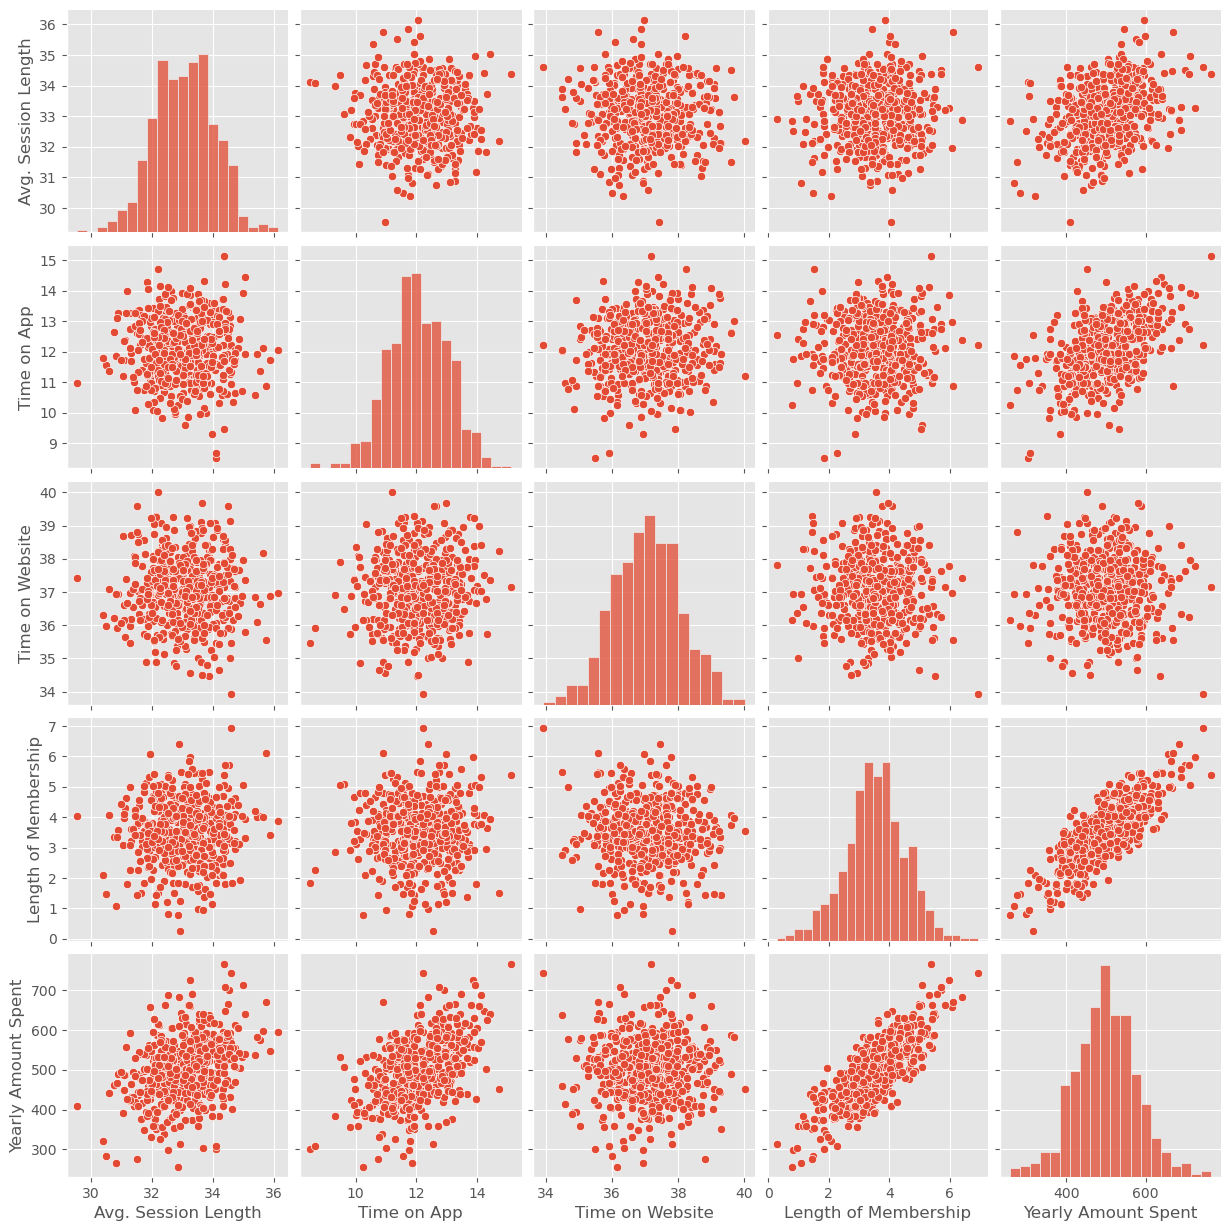

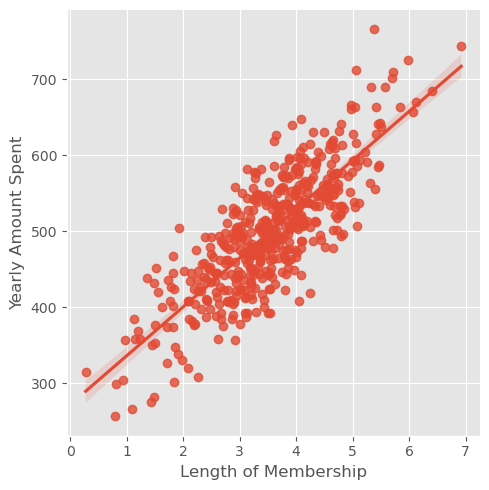

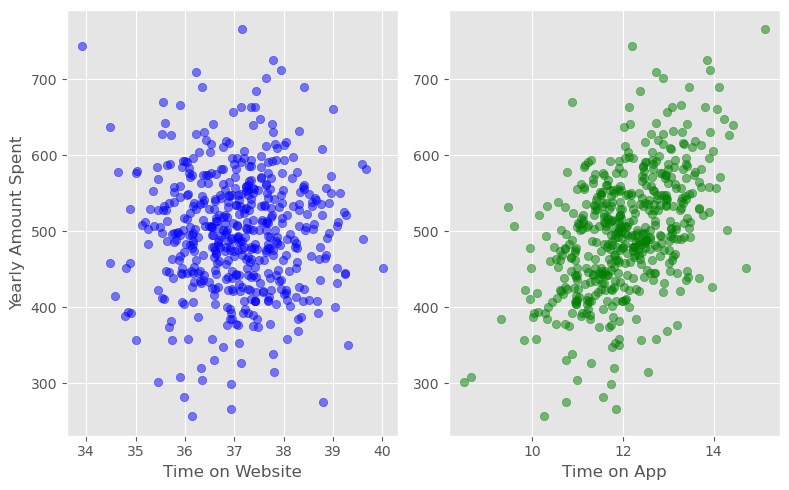

In [12]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers, color='blue')
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers, color='green')
sns.jointplot(x='Time on App',y='Length of Membership',kind='hex',data=customers, color='green', gridsize=20)
sns.pairplot(customers)    
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

#g = sns.PairGrid(customers)
#g.map(plt.scatter)
#g.map_diag(plt.hist, bins=50)
#g.map_upper(plt.scatter)
#g.map_lower(sns.kdeplot) 

fig, ax = plt.subplots(figsize=(8, 5), ncols=2, nrows=1)
ax[0].scatter(customers['Time on Website'], customers['Yearly Amount Spent'], color='blue', alpha=0.5)
ax[0].set_xlabel('Time on Website')
ax[0].set_ylabel('Yearly Amount Spent')
ax[1].scatter(customers['Time on App'], customers['Yearly Amount Spent'], color='green', alpha=0.5)
ax[1].set_xlabel('Time on App')
#ax[1].set_ylabel('Yearly Amount Spent')
plt.tight_layout()


* Existe una tendencia positiva entre "Length of Membership" y "Yearly Amount Spent", lo que sugiere que cuanto más tiempo ha estado un cliente con la empresa, más tienden a gastar anualmente. Esta es probablemente la relación más fuerte visible en los gráficos de dispersión.

* "Time on App" y "Yearly Amount Spent" también parecen tener una correlación positiva moderada, lo que indica que un mayor uso de la aplicación puede estar asociado con un mayor gasto anual.
  
* "Time on Website" no muestra una relación tan clara con "Yearly Amount Spent" como "Time on App", lo que puede sugerir que mejorar la experiencia de la aplicación podría ser más rentable que las inversiones en el sitio web, al menos en términos de aumentar el gasto directo.
  
* "Time on App" y "Time on Website" muestran distribuciones que parecen ser aproximadamente normales, lo que indica una variabilidad estándar en el tiempo que los clientes pasan en la aplicación y el sitio web respectivamente.
  
* "Length of Membership" parece tener una distribución sesgada a la derecha, lo que podría indicar que hay más clientes nuevos que clientes con membresías de largo plazo.

* "Yearly Amount Spent" también muestra una distribución aproximadamente normal, lo cual es útil para muchas técnicas estadísticas que asumen la normalidad de los datos.

## Training and Testing Data

In [24]:
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

## Predicting Test Data

Text(0, 0.5, 'Predicted Y')

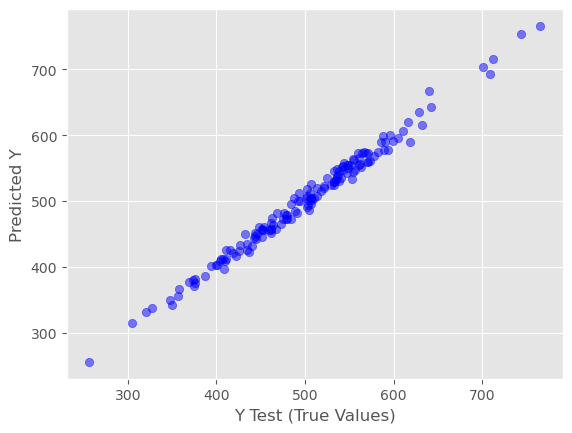

In [25]:
predictions = lm.predict(X_test)
#len(predictions)
plt.scatter(y_test,predictions, color='blue', alpha=0.5 )
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted Y')

* El gráfico muestra que a medida que los valores reales aumentan, los predichos también lo hacen, lo cual es característico de una buena precisión del modelo.

## Evaluating the Model

In [21]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print("------------------------")
print("R^2:", metrics.explained_variance_score(y_test,predictions))

MAE: 7.228148653430815
MSE: 79.81305165097409
RMSE: 8.933815066978614
------------------------
R^2: 0.9890771231889607


* El modelo de regresión parece tener un rendimiento excelente, con errores promedio relativamente bajos (MAE y RMSE) y un ajuste de modelo muy alto (R²). Esto concuerda con la observación inicial del gráfico de dispersión, donde las predicciones parecen seguir muy de cerca a los valores reales.

Nota: 
Varianza. Medida de dispersion de los datos respecto a su media. 
R^2. Mide la proporción en que se ha logrado "capturar" la varianza de los datos originales. Entre 0(peor) y 1(mejor)

## Residuals

<Axes: xlabel='Yearly Amount Spent', ylabel='Count'>

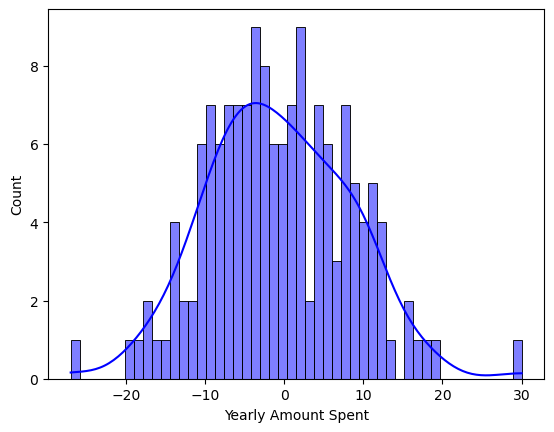

In [89]:
sns.histplot((y_test-predictions),bins=50, kde=True, color='blue')

* En general, el modelo tiene muy buen ajuste.

## Conclusion

In [23]:
lm.coef_
lm.intercept_
cdf = pd.DataFrame(lm.coef_, X_train.columns, columns=['Coefficients'])
cdf.loc['INTERCEPT'] = lm.intercept_
cdf

,Coefficients
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097
INTERCEPT,-1047.932782


**Los coeficientes obtenidos de esta regresión lineal múltiple ofrecen una visión detallada de cómo cada variable independiente: la "Duración Promedio de la Sesión", el "Tiempo en la App", el "Tiempo en el Sitio Web", y la "Duración de la Membresía", afecta la variable dependiente, "Gasto Anual".**


**Interpretación de los Coeficientes:**

* Duración Promedio de la Sesión (25.981550): Por cada unidad adicional que los clientes pasan en sus sesiones, se espera que su gasto anual aumente en promedio 25.98 unidades monetarias. Esto sugiere que una experiencia de usuario atractiva y efectiva durante las sesiones podría contribuir positivamente al gasto del cliente.

* Tiempo en la App (38.590159): Este coeficiente es bastante más alto que el de la duración de la sesión y el tiempo en el sitio web, indicando que el tiempo que los clientes pasan en la aplicación móvil tiene una relación más fuerte con el aumento del gasto. Por cada minuto adicional que un cliente pasa en la app, su gasto anual aumenta en promedio 38.59 unidades monetarias. Esto señala que la aplicación móvil podría ser un canal particularmente efectivo para impulsar las ventas.

* Tiempo en el Sitio Web (0.190405): A diferencia del tiempo en la app, el tiempo que los clientes pasan en el sitio web parece tener un impacto mucho menor en el gasto anual, con un aumento promedio de solo 0.19 unidades monetarias por cada unidad adicional de tiempo. Esto sugiere que, en comparación con la aplicación móvil, el sitio web es mucho menos efectivo en términos de impulsar un mayor gasto por parte de los clientes.

* Duración de la Membresía (61.279097): Este es el coeficiente más alto, lo que indica que la duración de la membresía tiene la relación más fuerte con el gasto anual. Por cada año adicional que un cliente permanece como miembro, su gasto anual aumenta en promedio 61.28 unidades monetarias. Esto destaca la importancia de retener a los clientes y fomentar las relaciones a largo plazo.

* Intercept (-1047.932782): El término de intercepción puede interpretarse como el gasto anual esperado cuando todas las variables independientes son cero.

**Conclusiones y Recomendaciones:**

Enfocarse en la App Móvil: Dado que el "Tiempo en la App" tiene un impacto significativamente mayor en el gasto anual en comparación con el "Tiempo en el Sitio Web", la empresa podría considerar invertir más recursos en mejorar y promocionar su aplicación móvil para aumentar la participación y el gasto del cliente.

Importancia de la Retención de Clientes: La "Duración de la Membresía" es claramente un factor crítico, lo que sugiere que estrategias para mejorar la retención de clientes y fomentar la lealtad pueden tener un retorno de inversión significativo en términos de gasto aumentado.

No Descuidar el Sitio Web: Aunque el "Tiempo en el Sitio Web" tiene un coeficiente bajo, no necesariamente significa que la empresa debería ignorar su sitio web. Quizás una buena desición sea enfocarse en el sitio web, para agregarle valor ya que es posible que ciertos segmentos de clientes todavía prefieran utilizarlo.

En resumen, los coeficientes sugieren que enfocar los esfuerzos en mejorar la experiencia de la aplicación móvil y en estrategias de retención de clientes podría ser más beneficioso para aumentar el gasto del cliente en esta empresa de e-commerce. Sin embargo, es importante recordar que estas recomendaciones deben considerarse junto con otros factores de negocio, análisis de costos y estrategias de mercado.